# Visualizing NLP Vectorized Text in Jupyter Notebook

This notebook demonstrates how to vectorize text data and visualize it using various techniques in Python.

## 1. Import Required Libraries

We will use pandas, matplotlib, seaborn, scikit-learn, and other libraries for vectorization and visualization.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.manifold import TSNE

# Set plot style
sns.set(style="whitegrid")
%matplotlib inline

## 2. Prepare Example Documents

Let's define a small set of example text documents to work with.

In [2]:
documents = [
    "The economy is working better than ever.",
    "The president addressed the nation on the economy.",
    "SpaceX launched a new rocket into orbit.",
    "NASA is planning a mission to Mars.",
    "The stock market reached an all-time high.",
    "Astronauts train for space missions at NASA."
]

## 3. Vectorize Text Data

We'll use `CountVectorizer` to convert the documents into a document-term matrix.

In [3]:
vectorizer = CountVectorizer(stop_words='english')
X = vectorizer.fit_transform(documents)
feature_names = vectorizer.get_feature_names_out()

In [4]:
feature_names

array(['addressed', 'astronauts', 'better', 'economy', 'high', 'launched',
       'market', 'mars', 'mission', 'missions', 'nasa', 'nation', 'new',
       'orbit', 'planning', 'president', 'reached', 'rocket', 'space',
       'spacex', 'stock', 'time', 'train', 'working'], dtype=object)

## 4. Visualize Document-Term Matrix as a DataFrame

Let's convert the sparse matrix to a pandas DataFrame to inspect the vectorized representation.

In [5]:
dtm_df = pd.DataFrame(X.toarray(), columns=feature_names)
dtm_df.index = [f"Doc {i+1}" for i in range(len(documents))]
dtm_df

,addressed,astronauts,better,economy,high,launched,market,mars,mission,missions,...,planning,president,reached,rocket,space,spacex,stock,time,train,working
Doc 1,0,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
Doc 2,1,0,0,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
Doc 3,0,0,0,0,0,1,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0
Doc 4,0,0,0,0,0,0,0,1,1,0,...,1,0,0,0,0,0,0,0,0,0
Doc 5,0,0,0,0,1,0,1,0,0,0,...,0,0,1,0,0,0,1,1,0,0
Doc 6,0,1,0,0,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,1,0


## 5. Visualize Word Frequencies with Bar Plot

We can sum the word counts across all documents and plot the most frequent words.

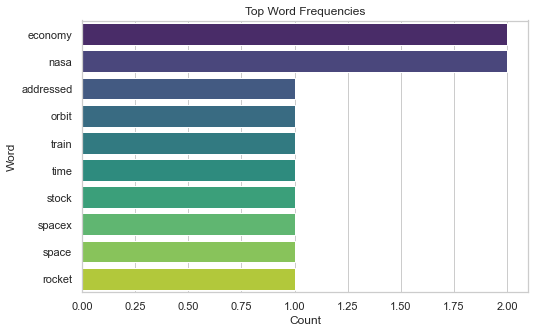

In [6]:
word_counts = np.asarray(X.sum(axis=0)).flatten()
word_freq = pd.Series(word_counts, index=feature_names)
top_n = 10
top_words = word_freq.sort_values(ascending=False).head(top_n)

plt.figure(figsize=(8, 5))
sns.barplot(x=top_words.values, y=top_words.index, palette="viridis")
plt.title("Top Word Frequencies")
plt.xlabel("Count")
plt.ylabel("Word")
plt.show()

## 6. Visualize Document Similarities with Heatmap

Let's compute pairwise cosine similarities between documents and visualize them using a heatmap.

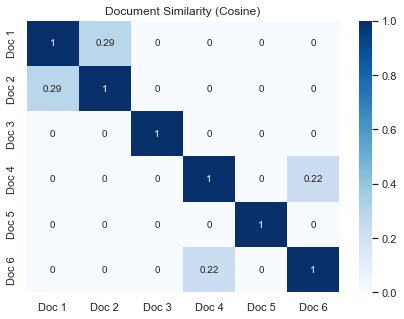

In [7]:
similarity_matrix = cosine_similarity(X)
plt.figure(figsize=(7, 5))
sns.heatmap(similarity_matrix, annot=True, cmap="Blues", xticklabels=[f"Doc {i+1}" for i in range(len(documents))], yticklabels=[f"Doc {i+1}" for i in range(len(documents))])
plt.title("Document Similarity (Cosine)")
plt.show()

## 7. Visualize Word Embeddings with t-SNE

We'll use t-SNE to reduce the dimensionality of the word vectors and plot them in 2D space.

c:\Users\adven\.conda\envs\py39\lib\site-packages\sklearn\manifold\_t_sne.py:795: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
c:\Users\adven\.conda\envs\py39\lib\site-packages\sklearn\manifold\_t_sne.py:805: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


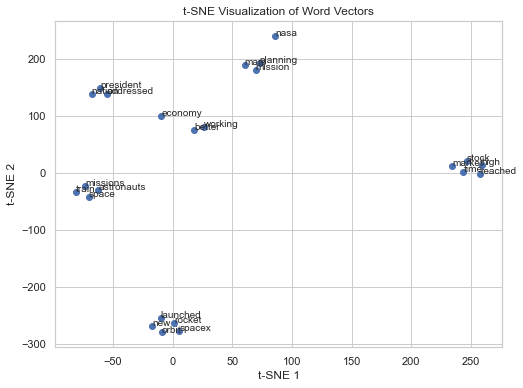

In [8]:
# Transpose X to get word vectors (words as rows)
word_vectors = X.T.toarray()

# Apply t-SNE
tsne = TSNE(n_components=2, random_state=42, perplexity=3)
word_vecs_2d = tsne.fit_transform(word_vectors)

plt.figure(figsize=(8, 6))
plt.scatter(word_vecs_2d[:, 0], word_vecs_2d[:, 1])

for i, word in enumerate(feature_names):
    plt.annotate(word, (word_vecs_2d[i, 0], word_vecs_2d[i, 1]))

plt.title("t-SNE Visualization of Word Vectors")
plt.xlabel("t-SNE 1")
plt.ylabel("t-SNE 2")
plt.show()